# Hypothesis Testing

In [645]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats


In [646]:
df = pd.read_csv("./data_pd/tips.csv")

In [647]:
# Extract the 'tip' column
tips = df['tip']
tips

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [648]:
# Hypothesized mean H0 = Population average tip value is $2.75
# mu_0 = 2.75
mu_0 = 2.98

In [649]:
# Calculate sample statistics
sample_mean = tips.mean()
sample_std = tips.std()
n = len(tips)
# sample_mean, sample_std, n

In [650]:
# Compute the standard error
standard_error = sample_std / np.sqrt(n)

In [651]:
# Compute the z-score
z_stat = (sample_mean -mu_0)/ standard_error
abs(z_stat)

0.20635614463378216

In [652]:
# Determine critical z-value for alpha
alpha = 0.05
critical_z_two_tailed = norm.ppf(1-alpha/2)  #Critical z for two tailed test (this is what we see manually on z-table)
critical_z_two_tailed

1.959963984540054

In [653]:
# p-value
p_value_two_tailed = 2*(1-norm.cdf(abs(z_stat)))


In [654]:
# Display result
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Std dev: {sample_std:.2f}")
print(f"Z-statistics: {z_stat:.2f}")
print(f"Critical Z (two tailed): {critical_z_two_tailed:.2f}")
print(f"p-value : {p_value_two_tailed}")

Sample Mean: 3.00
Sample Std dev: 1.38
Z-statistics: 0.21
Critical Z (two tailed): 1.96
p-value : 0.8365127250515529


In [655]:
# Interpret result for two tailed test
if abs(z_stat) > critical_z_two_tailed:
    print("Reject the null hypothesis for the two-tailed")
else:
    print("Fail to reject the null hypothesis for the two-tailed test.")

Fail to reject the null hypothesis for the two-tailed test.


In [656]:
# Interpret result at alpha = 0.05
if p_value_two_tailed < alpha:
    print("Reject the null hypothesis for the two-tailed")
else:
    print("Fail to reject the null hypothesis for the two-tailed test.")

Fail to reject the null hypothesis for the two-tailed test.


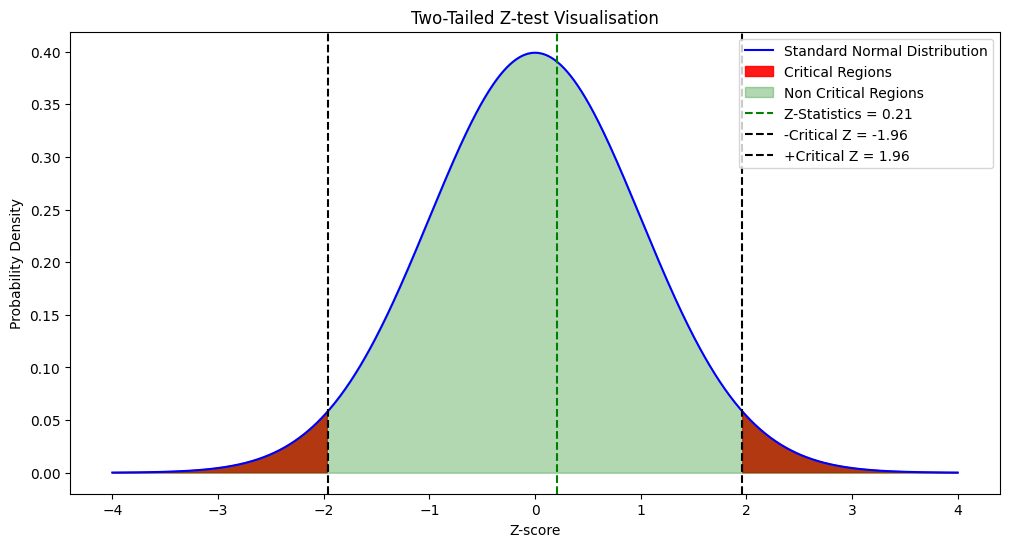

In [657]:
plt.figure(figsize=(12,6))
x = np.linspace(-4,4,1000)
y = norm.pdf(x)
plt.plot(x,y,label="Standard Normal Distribution", color='blue')
# Critical Regions
plt.fill_between(x,0,y,where = (x <= -critical_z_two_tailed) | (x >= critical_z_two_tailed), color='red', alpha=0.9, label="Critical Regions")
plt.fill_between(x,0,y,where = (x > -critical_z_two_tailed) | (x < critical_z_two_tailed), color='green', alpha=0.3, label="Non Critical Regions")

# Mark z-ststistics
plt.axvline(z_stat, color='green', linestyle='--', label=f"Z-Statistics = {z_stat:.2f}")

# Annonate critical z-values
plt.axvline(-critical_z_two_tailed, color='black', linestyle='--', label=f"-Critical Z = {-critical_z_two_tailed:.2f}")
plt.axvline(critical_z_two_tailed, color='black', linestyle='--', label=f"+Critical Z = {+critical_z_two_tailed:.2f}")

plt.title("Two-Tailed Z-test Visualisation")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [658]:
critical_z_one_tailed = stats.norm.ppf(1-alpha)
critical_z_one_tailed

1.6448536269514722

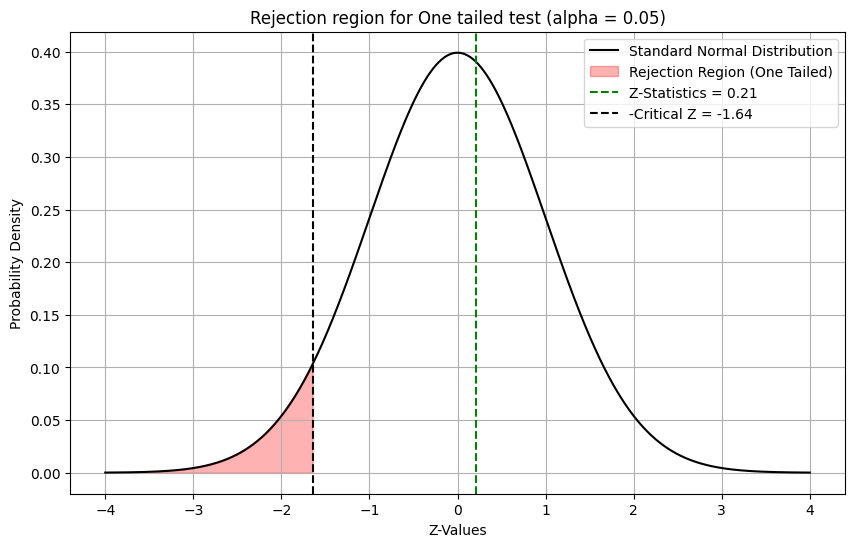

In [ ]:
# Plot Rejection region for one tailed test
plt.figure(figsize=(10,6))
plt.plot(x,y, color='black',label="Standard Normal Distribution")
plt.fill_between(x , 0,y, where=(x <= -critical_z_one_tailed) , color='red', alpha=0.3, label='Rejection Region (One Tailed)')
# Mark z-ststistics
plt.axvline(z_stat, color='green', linestyle='--', label=f"Z-Statistics = {z_stat:.2f}")

# Annonate critical z-values
plt.axvline(- critical_z_one_tailed, color='black', linestyle='--', label=f"-Critical Z = {-critical_z_one_tailed:.2f}")
plt.xlabel('Z-Values')
plt.ylabel('Probability Density')
plt.title('Rejection region for One tailed test (alpha = 0.05)')
plt.legend()
plt.grid(True)
plt.show()

## Titanic Dataset
    - Do hypothesis testing on the age column of the titanic dataset. Assume that population age(meu) = 25.
    - Interpret the test statistics and p-value. Then repeat for meu = 28

In [660]:
titanic_df = pd.read_csv("./data_pd/tested.xls")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [661]:
age = titanic_df['Age']
# meu = 25
# meu = 28
meu = 30 


In [662]:
# Calculate sample statistics
sample_mean = age.mean()
sample_std = age.std()
n = len(age)
sample_mean, sample_std, n

(30.272590361445783, 14.181209235624422, 418)

In [663]:
# Compute the standard error
standard_error = sample_std / np.sqrt(n)

In [664]:
# Compute the z-score
z_stat = (sample_mean -meu)/ standard_error
abs(z_stat)

0.39299350382225734

In [665]:
# Determine critical z-value for alpha
alpha = 0.05
critical_z_two_tailed = norm.ppf(1-alpha/2)  #Critical z for two tailed test (this is what we see manually on z-table)
critical_z_two_tailed

1.959963984540054

In [666]:
# p-value
p_value_two_tailed = 2*(1-norm.cdf(abs(z_stat)))

In [667]:
# Display result
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Std dev: {sample_std:.2f}")
print(f"Z-statistics: {z_stat:.2f}")
print(f"Critical Z (two tailed): {critical_z_two_tailed:.2f}")
print(f"p-value : {p_value_two_tailed}")

Sample Mean: 30.27
Sample Std dev: 14.18
Z-statistics: 0.39
Critical Z (two tailed): 1.96
p-value : 0.6943242793872655


In [668]:
# Interpret result for two tailed test
if abs(z_stat) > critical_z_two_tailed:
    print("Reject the null hypothesis for the two-tailed")
else:
    print("Fail to reject the null hypothesis for the two-tailed test.")

Fail to reject the null hypothesis for the two-tailed test.


In [669]:
# Interpret result for two tailed test
if abs(z_stat) > critical_z_two_tailed:
    print("Reject the null hypothesis for the two-tailed")
else:
    print("Fail to reject the null hypothesis for the two-tailed test.")

Fail to reject the null hypothesis for the two-tailed test.


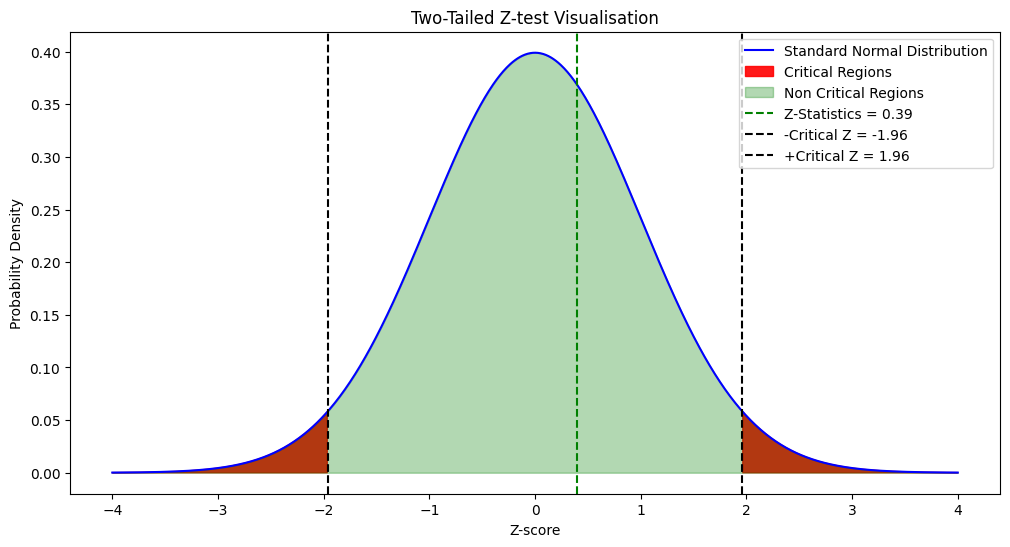

In [670]:
plt.figure(figsize=(12,6))
x = np.linspace(-4,4,1000)
y = norm.pdf(x)
plt.plot(x,y,label="Standard Normal Distribution", color='blue')
# Critical Regions
plt.fill_between(x,0,y,where = (x <= -critical_z_two_tailed) | (x >= critical_z_two_tailed), color='red', alpha=0.9, label="Critical Regions")
plt.fill_between(x,0,y,where = (x > -critical_z_two_tailed) | (x < critical_z_two_tailed), color='green', alpha=0.3, label="Non Critical Regions")

# Mark z-ststistics
plt.axvline(z_stat, color='green', linestyle='--', label=f"Z-Statistics = {z_stat:.2f}")

# Annonate critical z-values
plt.axvline(-critical_z_two_tailed, color='black', linestyle='--', label=f"-Critical Z = {-critical_z_two_tailed:.2f}")
plt.axvline(critical_z_two_tailed, color='black', linestyle='--', label=f"+Critical Z = {+critical_z_two_tailed:.2f}")

plt.title("Two-Tailed Z-test Visualisation")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

## Two Tailed vs One Tailed test

In [671]:
alpha = 0.05
critical_z_two_tailed = stats.norm.ppf(1-alpha/2)
critical_z_one_tailed = stats.norm.ppf(1-alpha)
critical_z_two_tailed, critical_z_one_tailed


(1.959963984540054, 1.6448536269514722)

In [672]:
# Generate x-values for the standard normal distribution
x_values = np.linspace(-3,3,1000)
# Generate y-values (probability) for the standard normal distribution
y_values = stats.norm.pdf(x_values)

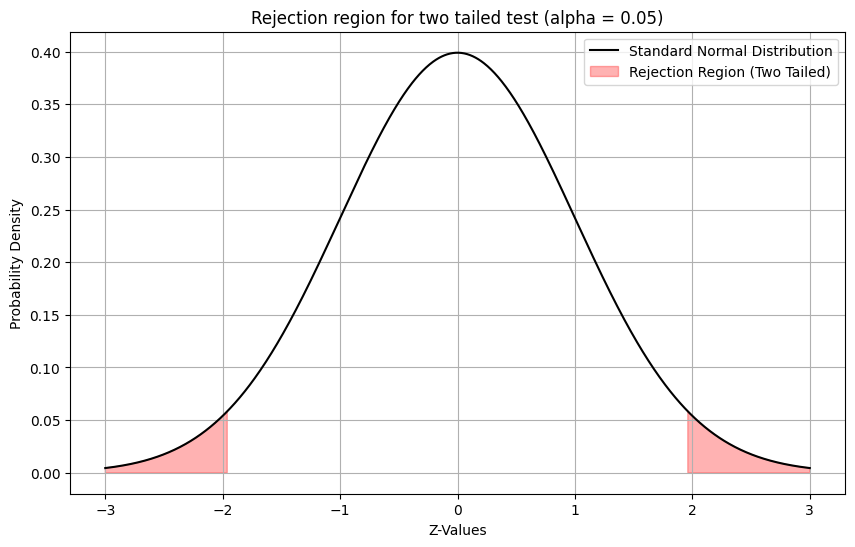

In [673]:
# Plot rejection region for two tailed test
plt.figure(figsize=(10,6))
plt.plot(x_values,y_values, color='black',label="Standard Normal Distribution")
plt.fill_between(x_values, 0 ,y_values, where=(x_values <= -critical_z_two_tailed) | (x_values >= critical_z_two_tailed), color='red', alpha=0.3, label='Rejection Region (Two Tailed)')
plt.xlabel('Z-Values')
plt.ylabel('Probability Density')
plt.title('Rejection region for two tailed test (alpha = 0.05)')
plt.legend()
plt.grid(True)
plt.show()



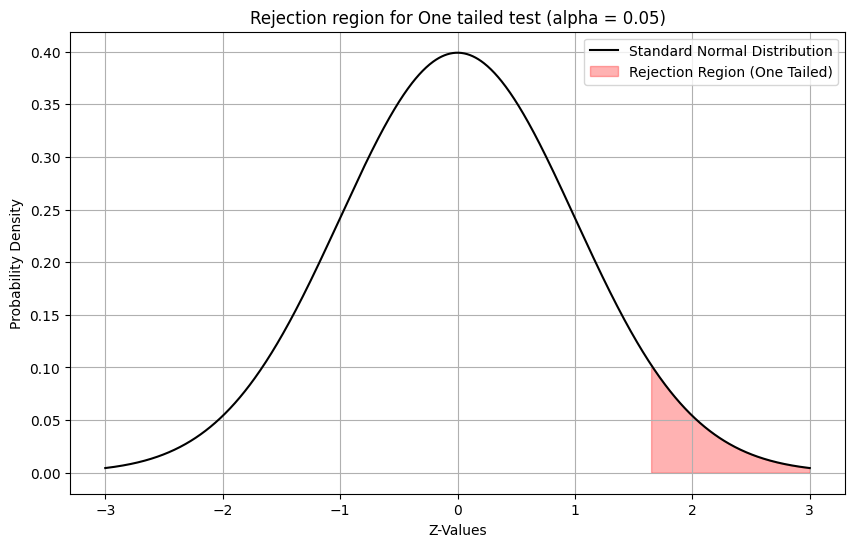

In [674]:
# Plot Rejection region for one tailed test
plt.figure(figsize=(10,6))
plt.plot(x_values,y_values, color='black',label="Standard Normal Distribution")
plt.fill_between(x_values , 0,y_values, where=(x_values >= critical_z_one_tailed) , color='red', alpha=0.3, label='Rejection Region (One Tailed)')
plt.xlabel('Z-Values')
plt.ylabel('Probability Density')
plt.title('Rejection region for One tailed test (alpha = 0.05)')
plt.legend()
plt.grid(True)
plt.show()